In [60]:
import numpy as np
import peewee as pw
import pandas as pd

from tqdm import tqdm
import plotly.graph_objects as go
import plotly as ply

from structure import Const, Solve, db,BaseModel
from solver import CONST_DEFAULT,DIR_PATH,df_from_comsol,write,get_solves,flat2image


In [ ]:
df = df_from_comsol()
df.head()

In [ ]:
q = {
    'light': (0, 0.00002),
    'KrD': (0, 1E100),
}

solves,datas =get_solves(q)
solves

In [ ]:
df = datas[1]

x= df['Time']
y = df['Q']
fig = go.FigureWidget()
fig.add_trace(
    go.Scatter(
        name='',
        x=x,
        y=y,
        mode='lines',
        # marker={'color': marker},
        # text=df[['flag','name']],
        # hovertemplate="""light: %{x:.1e}
        # <br>integral: %{y:.2s}
        # <br>Flag: %{text[0]}
        # <br>Name: %{text[1]}
        # """
        # ,
    ))
fig.update_layout(
    height=500,
    margin={'r': 0, 'l': 0, 't': 0, 'b': 0},
    legend=dict(x=-0.1, y=1, xanchor="center"),    
)


# def update_point(trace, points, selector):
#     for i in points.point_inds:
#         cur_flag = int(trace.text[i][0])
#         mask = df['flag'] == cur_flag
#         show_consts = [
#             i for i in CONSTS 
#             if i not in ['k1', 'k2', 'k11']
#         ]
#         consts = df[mask][show_consts].drop_duplicates().head(1).squeeze()
#         consts_dict = dict(consts)
#         consts_list = [
#             f'{key:>}: {consts_dict[key]:<.5g}' for key in consts_dict
#         ]
#         print(f'Flag:{cur_flag}')
#         print(' '.join(consts_list))


# scatter = fig.data[0]
# scatter.on_click(update_point)
fig

# Test

In [73]:
x = np.random.rand(100)
y = np.random.rand(100)
z = x**y * 10

X,Y,Z = flat2image(x,y,z,method='cubic',grid_points=11)

fig = go.Figure(go.Surface(x=X, y=Y, z=Z))
# fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers'))

fig.update_layout(
    height=500,
    margin={
        'r': 0, 'l': 0, 't': 0, 'b': 0
    },
    legend=dict(x=-0.1, y=1, xanchor="center"),
)

fig

In [75]:
A = np.stack((x, y, z)).T
R = np.array([
    [1, 1, 0],
    [0, 20, 0],
    [0, 0, 1],
])
A = A@R

In [76]:
X,Y,Z =flat2image(A[:,0],A[:,1],A[:,2],method='cubic',grid_points=111)
fig = go.Figure(go.Surface(x=X, y=Y, z=Z))
# fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers'))

fig.update_layout(
    height=500,
    margin={
        'r': 0, 'l': 0, 't': 0, 'b': 0
    },
    legend=dict(x=-0.1, y=1, xanchor="center"),
)

fig

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [78]:
X = np.stack((x,y)).T
y  = z
a= np.linspace(0,1,2)

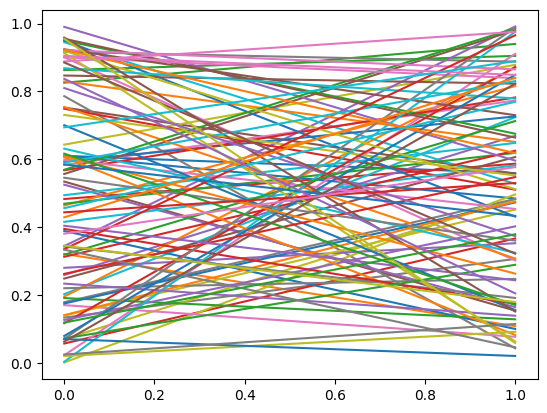

In [79]:
plt.plot(a,X.T);

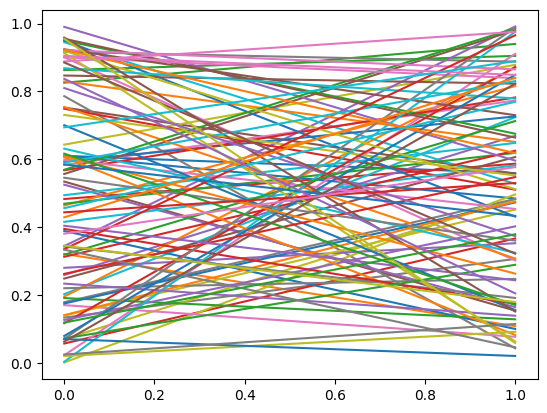

In [80]:
X1= savgol_filter(X,2,polyorder=1)
plt.plot(a,X1.T);

In [81]:
Xstd = StandardScaler().fit_transform(X)

In [92]:
pca = PCA(n_components=1)
Xred = pca.fit_transform(Xstd)
pca.components_

array([[-0.70710678, -0.70710678]])

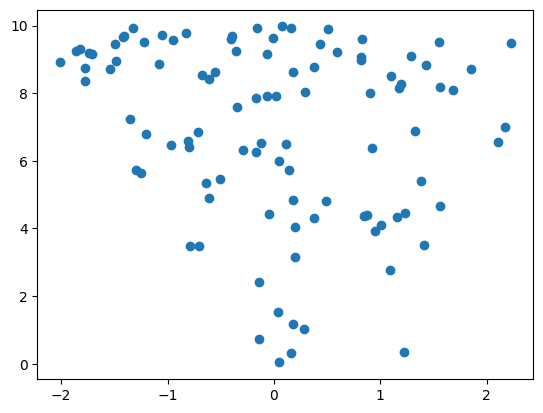

In [93]:
plt.scatter(Xred,y)

# Slider

In [6]:
import plotly.express as px

df = px.data.gapminder()

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [14]:
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="continent",
    # animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=55,
    range_x=[100, 100000],
    range_y=[25, 90],
)

fig.update_layout(
    height=500,
    margin={
        'r': 0, 'l': 0, 't': 0, 'b': 0
    },
    legend=dict(x=-0.1, y=1, xanchor="left"),
)
fig["layout"].pop("updatemenus")  
fig